In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sensors as sn
import em_tools as em
import subspace_methods as sm

In [2]:
DIST_RATIO = 0.5

In [3]:
Num_sensors1 = 25
Num_emitters1 = 1
sample_size1 = 12

failing_sensors1 = np.arange(5)
gap_ratio1 = 0.5 * np.ones_like(failing_sensors1, dtype=np.float32)

theta1_rad = np.array([0.7]) # Угловые координаты источников (DoA) в радианах
theta1_deg = np.rad2deg(theta1_rad) # Угловые координаты источников (DoA) в градусах
P1 = 0.5 * np.eye(Num_emitters1, dtype=np.float64) # Ковариация сигналов
Q1 = 8.1 * np.eye(Num_sensors1, dtype=np.float64) # Ковариация шумов
A1 = (np.exp(-2j * np.pi * DIST_RATIO * np.arange(Num_sensors1).reshape(-1,1) * 
             np.sin(theta1_rad))) # Матрица векторов направленности
# Генерация сигналов, шумов и наблюдений
S1 = sn.gss(Num_emitters1, sample_size1, P1)
N1 = sn.gss(Num_sensors1, sample_size1, Q1)
X1 = (A1 @ S1.T + N1.T).T
X1_with_mv = sn.MCAR(X1, failing_sensors1, gap_ratio1)
R1 = sn.initial_Cov(X1_with_mv)
MUSIC_theta1 = sm.MUSIC_DoA(R1, Num_emitters1)

In [4]:
MUSIC_theta1

array([0.71558499])

In [5]:
sn.SNR(A1, P1, Q1, metrics = 'avg', scale = 'linear')

np.float64(1.54320987654321)

In [6]:
EM_theta1_rad, EM_P1, lhd_1, lhd_list1, angles_list1 = em.multistart_EM2(X1_with_mv, 
                                                                         Num_emitters1, 
                                                                         Q=Q1,
                                                                         theta_guess=MUSIC_theta1, 
                                                                         num_of_starts=1, 
                                                                         max_iter=25, 
                                                                         rtol=1e-5)

0-th start
theta=[0.71558499],P=[[1.18642836e-07-1.98523347e-24j]]
Iteration=0
likelihood is -870.3064393934375 on iteration 0.
Iteration=1
likelihood is -870.2041431524815 on iteration 1.
Iteration=2
likelihood is -870.0947127015846 on iteration 2.
Iteration=3
likelihood is -869.9829650314755 on iteration 3.
Iteration=4
likelihood is -869.8631389374502 on iteration 4.
Iteration=5
likelihood is -869.732338909426 on iteration 5.
Iteration=6
likelihood is -869.5880976817277 on iteration 6.
Iteration=7
likelihood is -869.423387182211 on iteration 7.
Iteration=8
likelihood is -869.2299997523312 on iteration 8.
Iteration=9
likelihood is -868.9973669839152 on iteration 9.
Iteration=10
likelihood is -868.7044474273923 on iteration 10.
Iteration=11
likelihood is -868.3232296553975 on iteration 11.
Iteration=12
likelihood is -867.8035530480352 on iteration 12.
Iteration=13
likelihood is -867.0597215364044 on iteration 13.
Iteration=14
likelihood is -865.9380999308046 on iteration 14.
Iteration=

In [7]:
EM_theta1_rad, EM_P1

(array([0.69660427]), array([[1.28938375+0.j]]))

In [8]:
em.incomplete_lkhd(X1_with_mv, EM_theta1_rad, EM_P1, Q1), em.incomplete_lkhd(X1_with_mv, theta1_rad, P1, Q1)

(np.float64(-850.5416534161163), np.float64(-852.4011191641745))

In [9]:
lhd_list1 = np.array(lhd_list1)
angles_list1 = np.rad2deg(np.array(angles_list1))
x1 = np.arange(len(angles_list1))

In [10]:
Num_sensors2 = 25
Num_emitters2 = 1
sample_size2 = 11

failing_sensors2 = np.arange(8)
gap_ratio2 = 0.5 * np.ones_like(failing_sensors2, dtype=np.float32)

theta2_rad = np.array([0.7]) # Угловые координаты источников (DoA) в радианах
theta2_deg = np.rad2deg(theta2_rad) # Угловые координаты источников (DoA) в градусах
P2 = 0.5 * np.eye(Num_emitters2, dtype=np.float64) # Ковариация сигналов
Q2 = 6.1 * np.eye(Num_sensors2, dtype=np.float64) # Ковариация шумов
A2 = (np.exp(-2j * np.pi * DIST_RATIO * np.arange(Num_sensors2).reshape(-1,1) * 
             np.sin(theta2_rad))) # Матрица векторов направленности
# Генерация сигналов, шумов и наблюдений
S2 = sn.gss(Num_emitters2, sample_size2, P2)
N2 = sn.gss(Num_sensors2, sample_size2, Q2)
X2 = (A2 @ S2.T + N2.T).T
X2_with_mv = sn.MCAR(X2, failing_sensors2, gap_ratio2)
R2 = sn.initial_Cov(X2_with_mv)
MUSIC_theta2 = sm.MUSIC_DoA(R2, Num_emitters2)

In [11]:
MUSIC_theta2

array([0.72431164])

In [12]:
sn.SNR(A2, P2, Q2, metrics = 'avg', scale = 'linear')

np.float64(2.0491803278688523)

In [13]:
EM_theta2_rad, EM_P2, lhd_2, lhd_list2, angles_list2 = em.multistart_EM2(X2_with_mv, 
                                                                         Num_emitters2, 
                                                                         Q=Q2,
                                                                         theta_guess=MUSIC_theta2, 
                                                                         num_of_starts=1, 
                                                                         max_iter=25, 
                                                                         rtol=1e-5)

0-th start
theta=[0.72431164],P=[[7.5917774e-08+4.13590306e-24j]]
Iteration=0
likelihood is -689.483063070951 on iteration 0.
Iteration=1


likelihood is -689.3738901161959 on iteration 1.
Iteration=2
likelihood is -689.2567674505078 on iteration 2.
Iteration=3
likelihood is -689.1365396927348 on iteration 3.
Iteration=4
likelihood is -689.0017102194244 on iteration 4.
Iteration=5
likelihood is -688.8541841252711 on iteration 5.
Iteration=6
likelihood is -688.6844059921156 on iteration 6.
Iteration=7
likelihood is -688.4839198627712 on iteration 7.
Iteration=8
likelihood is -688.2374045166027 on iteration 8.
Iteration=9
likelihood is -687.9190217468987 on iteration 9.
Iteration=10
likelihood is -687.4891125736523 on iteration 10.
Iteration=11
likelihood is -686.8741744426684 on iteration 11.
Iteration=12
likelihood is -685.9421342613443 on iteration 12.
Iteration=13
likelihood is -684.4515773012034 on iteration 13.
Iteration=14
likelihood is -682.0211541351272 on iteration 14.
Iteration=15
likelihood is -678.4069319584889 on iteration 15.
Iteration=16
likelihood is -674.6642493596522 on iteration 16.
Iteration=17
likelihoo

In [14]:
EM_theta2_rad, EM_P2

(array([0.70161887]), array([[0.71598568+0.j]]))

In [15]:
em.incomplete_lkhd(X2_with_mv, EM_theta2_rad, EM_P2, Q2), em.incomplete_lkhd(X2_with_mv, theta2_rad, P2, Q2)

(np.float64(-673.0752083504324), np.float64(-673.6467390084401))

In [16]:
lhd_list2 = np.array(lhd_list2)
angles_list2 = np.rad2deg(np.array(angles_list2))
x2 = np.arange(len(angles_list2))

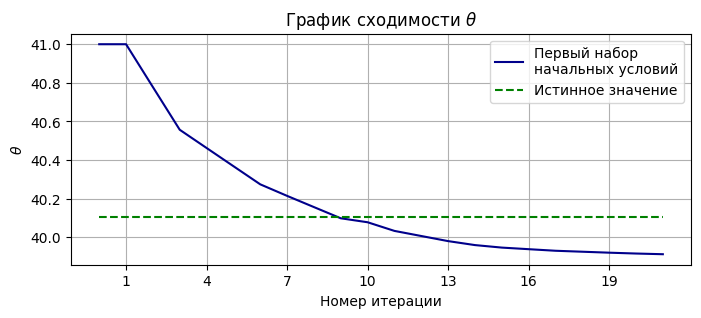

In [17]:
plt.figure(figsize=(8, 3))
plt.title(r'$\text{График сходимости} \,\,\theta$')
plt.plot(x1, angles_list1,color='darkblue', label=f'Первый набор\nначальных условий')
plt.plot(x1, np.tile(theta1_deg, len(angles_list1)), color='green', label='Истинное значение', linestyle='--')
plt.xlabel('Номер итерации') 
plt.ylabel(r'$\theta$')
plt.xticks(np.arange(1,20,3))
plt.legend()
plt.grid()
plt.show()

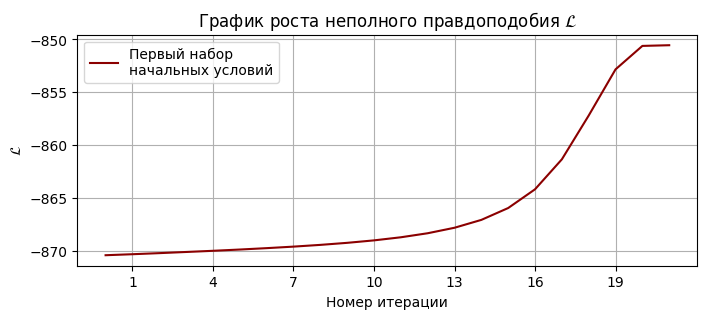

In [18]:
plt.figure(figsize=(8, 3))
plt.title(r'$\text{График роста неполного правдоподобия} \,\,\mathcal{L}$')
plt.plot(x1, lhd_list1, color='darkred', label=f'Первый набор\nначальных условий')
plt.xlabel('Номер итерации') 
plt.ylabel(r'$\mathcal{L}$')
plt.xticks(np.arange(1,20,3))
plt.legend()
plt.grid()
plt.show()

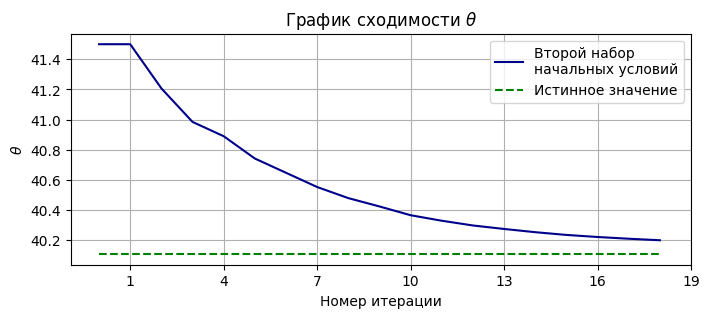

In [19]:
plt.figure(figsize=(8, 3))
plt.title(r'$\text{График сходимости} \,\,\theta$')
plt.plot(x2, angles_list2,color='darkblue', label=f'Второй набор\nначальных условий')
plt.plot(x2, np.tile(theta2_deg, len(angles_list2)), color='green', label='Истинное значение', linestyle='--')
plt.xlabel('Номер итерации') 
plt.ylabel(r'$\theta$')
plt.xticks(np.arange(1,20,3))
plt.legend()
plt.grid()
plt.show()

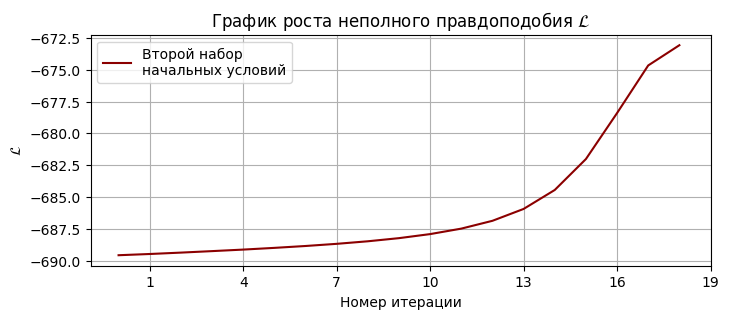

In [20]:
plt.figure(figsize=(8, 3))
plt.title(r'$\text{График роста неполного правдоподобия} \,\,\mathcal{L}$')
plt.plot(x2, lhd_list2,color='darkred', label=f'Второй набор\nначальных условий')
plt.xlabel('Номер итерации') 
plt.ylabel(r'$\mathcal{L}$')
plt.xticks(np.arange(1,20,3))
plt.legend()
plt.grid()
plt.show()